<a href="https://colab.research.google.com/github/bagmitathakur/SpaceShip-Prediction/blob/main/SPACESHIP_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

https://raw.githubusercontent.com/bagmitathakur/SpaceShip-Prediction/main/train%20(1).csv

https://raw.githubusercontent.com/bagmitathakur/SpaceShip-Prediction/main/test.csv

In [359]:

import pandas as pd
train_set=pd.read_csv('https://raw.githubusercontent.com/bagmitathakur/SpaceShip-Prediction/main/train%20(1).csv')


train_set.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [360]:
test_set=pd.read_csv('https://raw.githubusercontent.com/bagmitathakur/SpaceShip-Prediction/main/test.csv')


test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [361]:
df_lst=[train_set,test_set]
df=pd.concat(df_lst)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [362]:
df=df.dropna()
print(df.isnull().sum())
print(df.info())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6606 non-null   object 
 1   HomePlanet    6606 non-null   object 
 2   CryoSleep     6606 non-null   object 
 3   Cabin         6606 non-null   object 
 4   Destination   6606 non-null   object 
 5   Age           6606 non-null   float64
 6   VIP           6606 non-null   object 
 7   RoomService   6606 non-null   float64
 8   FoodCourt     6606 non-null   float64
 9   ShoppingMall  6606 non-null   float64
 10  Spa           6606 non-null   float64
 11  VRDeck        6606 non-null   float64
 12  Name          6606 no

In [363]:

lst=['Transported','VIP','CryoSleep']

df[lst]=df[lst].astype(int)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [364]:
df_int=df.select_dtypes(include=['int64','float64'])
df_int.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [365]:
obj_df=df.select_dtypes(include='object')
obj_df.head()

,PassengerId,HomePlanet,Cabin,Destination,Name
0,0001_01,Europa,B/0/P,TRAPPIST-1e,Maham Ofracculy
1,0002_01,Earth,F/0/S,TRAPPIST-1e,Juanna Vines
2,0003_01,Europa,A/0/S,TRAPPIST-1e,Altark Susent
3,0003_02,Europa,A/0/S,TRAPPIST-1e,Solam Susent
4,0004_01,Earth,F/1/S,TRAPPIST-1e,Willy Santantines


In [366]:
dummy_df=pd.get_dummies(obj_df)
dummy_df.head()

,PassengerId_0001_01,PassengerId_0002_01,PassengerId_0003_01,PassengerId_0003_02,PassengerId_0004_01,PassengerId_0005_01,PassengerId_0006_01,PassengerId_0007_01,PassengerId_0008_01,PassengerId_0008_03,...,Name_Zinonon Veriedeezy,Name_Zinopus Spandisket,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Pasharne
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [367]:
new_lst=[df_int,obj_df]
new_df=pd.concat(new_lst,axis=1)
new_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId,HomePlanet,Cabin,Destination,Name
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0001_01,Europa,B/0/P,TRAPPIST-1e,Maham Ofracculy
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0002_01,Earth,F/0/S,TRAPPIST-1e,Juanna Vines
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0003_01,Europa,A/0/S,TRAPPIST-1e,Altark Susent
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0003_02,Europa,A/0/S,TRAPPIST-1e,Solam Susent
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0004_01,Earth,F/1/S,TRAPPIST-1e,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,9276_01,Europa,A/98/P,55 Cancri e,Gravior Noxnuther
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,9278_01,Earth,G/1499/S,PSO J318.5-22,Kurta Mondalley
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,9279_01,Earth,G/1500/S,TRAPPIST-1e,Fayey Connon
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,9280_01,Europa,E/608/S,55 Cancri e,Celeon Hontichre


In [368]:
new_df=new_df.drop(columns=['Cabin','ShoppingMall','FoodCourt','CryoSleep'],axis=1)
new_df

,Age,VIP,RoomService,Spa,VRDeck,Transported,PassengerId,HomePlanet,Destination,Name
0,39.0,0,0.0,0.0,0.0,0,0001_01,Europa,TRAPPIST-1e,Maham Ofracculy
1,24.0,0,109.0,549.0,44.0,1,0002_01,Earth,TRAPPIST-1e,Juanna Vines
2,58.0,1,43.0,6715.0,49.0,0,0003_01,Europa,TRAPPIST-1e,Altark Susent
3,33.0,0,0.0,3329.0,193.0,0,0003_02,Europa,TRAPPIST-1e,Solam Susent
4,16.0,0,303.0,565.0,2.0,1,0004_01,Earth,TRAPPIST-1e,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1,0.0,1643.0,74.0,0,9276_01,Europa,55 Cancri e,Gravior Noxnuther
8689,18.0,0,0.0,0.0,0.0,0,9278_01,Earth,PSO J318.5-22,Kurta Mondalley
8690,26.0,0,0.0,1.0,0.0,1,9279_01,Earth,TRAPPIST-1e,Fayey Connon
8691,32.0,0,0.0,353.0,3235.0,0,9280_01,Europa,55 Cancri e,Celeon Hontichre


In [369]:
dct_x={'Europa':0,'Earth':1,'Mars':3}
new_df['HomePlanet']=new_df['HomePlanet'].map(dct_x)
new_df['HomePlanet']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    1
8690    1
8691    0
8692    0
Name: HomePlanet, Length: 6606, dtype: int64

In [370]:
print(new_df['Destination'].value_counts())
dct_1={'TRAPPIST-1e':0,'55 Cancri e':1,'PSO J318.5-22':2}
new_df['Destination']=new_df['Destination'].map(dct_1)
new_df['Destination']

TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: Destination, dtype: int64


0       0
1       0
2       0
3       0
4       0
       ..
8688    1
8689    2
8690    0
8691    1
8692    0
Name: Destination, Length: 6606, dtype: int64

In [371]:
from sklearn.model_selection import train_test_split


x=new_df.iloc[:,:-1]
x=x.drop(columns=['Transported'],axis=1)
y=new_df['Transported']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)


In [372]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_train_pr=lr.predict(x_train)
y_test_pr=lr.predict(x_test)
print(lr.score(x_train,y_train))

0.7519463667820069


accuracy is 75%

the above classification report shows that the f1 scores for label 1 is moderate and that for label 0 is zero

RECURSIVE FEATURE ELIMINATION

In [373]:
from sklearn.metrics import f1_score

from sklearn.feature_selection import RFE
dct_1={}
for i in range(1,len(x_train.columns)+1):
  log_reg=LogisticRegression()
  rfe=RFE(log_reg,n_features_to_select=i)
  rfe.fit(x_train,y_train)
  rfe_features=list(x_train.columns[rfe.support_])

  lr_1=LogisticRegression().fit(x_train[rfe_features],y_train)
  y_pred_x=pd.Series(lr_1.predict(x_test[rfe_features]))
  f1_scores_array=f1_score(y_test,y_pred_x,average=None)
  dct_1[i]={'Features':list(rfe_features),'f1 score':f1_scores_array}
  

In [374]:
pd.options.display.max_colwidth=200
f1_df=pd.DataFrame.from_dict(dct_1,orient='index')
f1_df

,Features,f1 score
1,[Destination],"[0.6183045128637705, 0.4318895166352793]"
2,"[Spa, Destination]","[0.4896206156048676, 0.7222438644331904]"
3,"[RoomService, Spa, Destination]","[0.636192861615529, 0.7545416138572031]"
4,"[Age, RoomService, Spa, Destination]","[0.636192861615529, 0.7545416138572031]"
5,"[Age, RoomService, Spa, VRDeck, Destination]","[0.7322970639032815, 0.7911989223170185]"
6,"[Age, RoomService, Spa, VRDeck, PassengerId, Destination]","[0.7379077615298089, 0.7868252516010978]"
7,"[Age, RoomService, Spa, VRDeck, PassengerId, HomePlanet, Destination]","[0.7379077615298089, 0.7868252516010978]"
8,"[Age, VIP, RoomService, Spa, VRDeck, PassengerId, HomePlanet, Destination]","[0.7379077615298089, 0.7868252516010978]"


f1 scores can be seen to become better from selecting 3 features at a time to selecting 7 features at a time ,therefore we take all the required features for convineance


DATA VISUALISATION
---



In [375]:
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D 

Bar plots

In [376]:
group_tr=new_df.groupby(by='Transported',as_index=False)
group_tr_size=group_tr.size()
group_tr_size.head()
fig=px.bar(data_frame=group_tr_size,x='Transported',y='size',color='Transported')
fig.show()


From the data visualisation we can conclude the no.of people to be more than the no.of people not transported.Therefore the data is imbalanced

Scatter plot showing relation between 'Transported' and 'Home Planet' columns

In [377]:
fig=px.scatter(x=x_train['HomePlanet'],y=y_train_pr,color=y_train_pr)
fig.show()

bar graph showing relation between 'HomePlanet' counts

In [378]:
sizes=x_train['HomePlanet'].value_counts()
sizes

1    2517
0    1159
3     948
Name: HomePlanet, dtype: int64

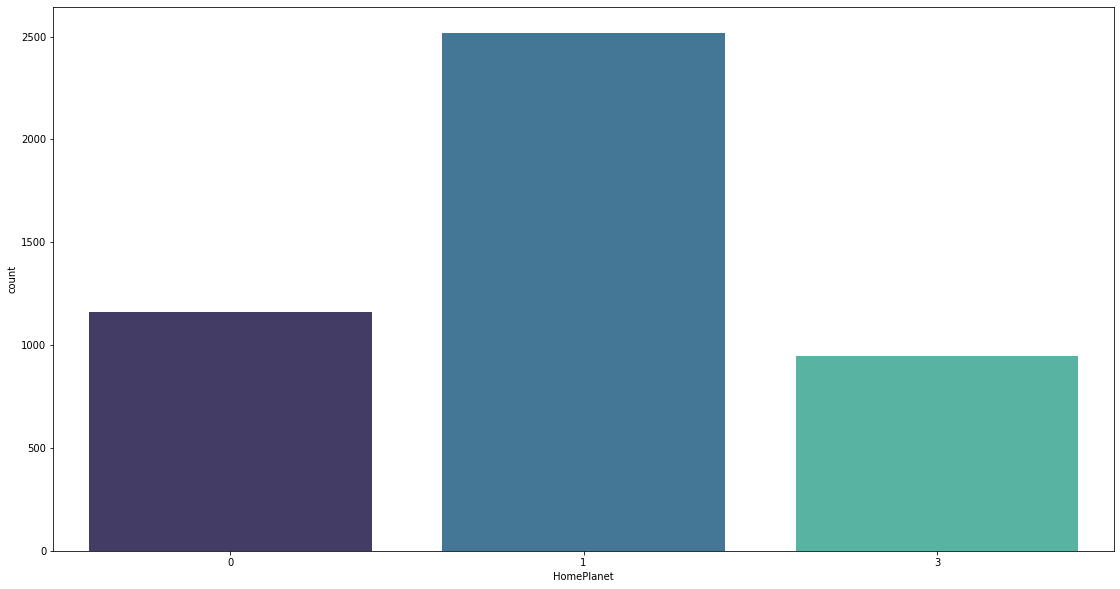

In [379]:
import matplotlib.pyplot as plt

plt.figure(figsize=(19,10))
sns.countplot(x='HomePlanet', data=x_train, palette='mako')

plt.show()

The graph shows that the majority of the people have earth as the home planet

(Destination and Transported columns relation)

In [380]:
n=x_train['Destination'].value_counts()
n

0    3180
1    1006
2     438
Name: Destination, dtype: int64

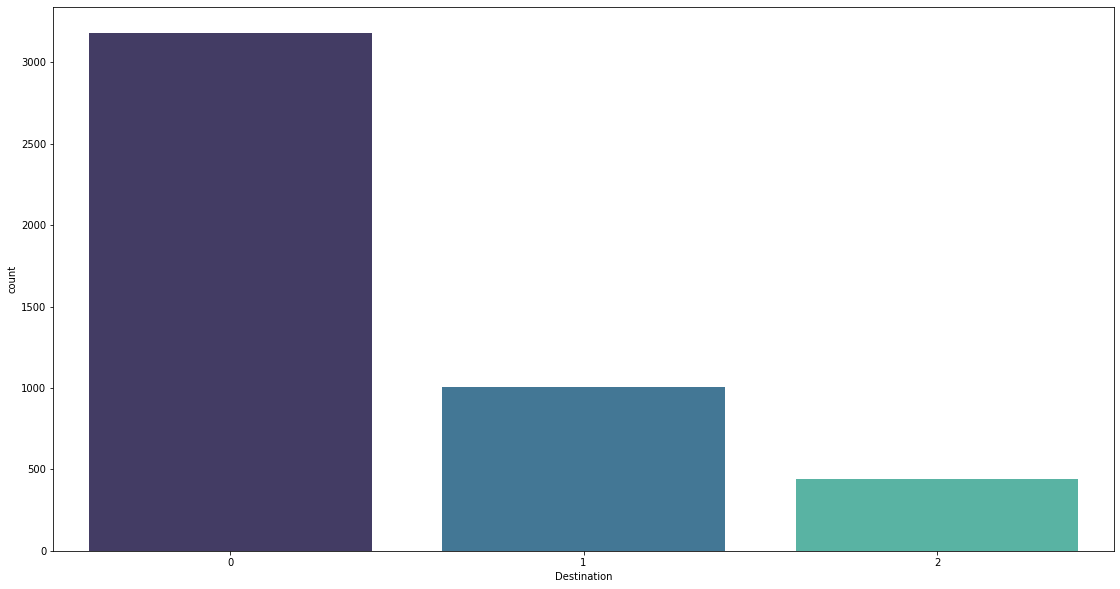

In [381]:

plt.figure(figsize=(19,10))
sns.countplot(x='Destination', data=x_train, palette='mako')

plt.show()

The graph shows that the majority of the people have TRAPPIST-1e as their destination

 cryo sleep count visualisation

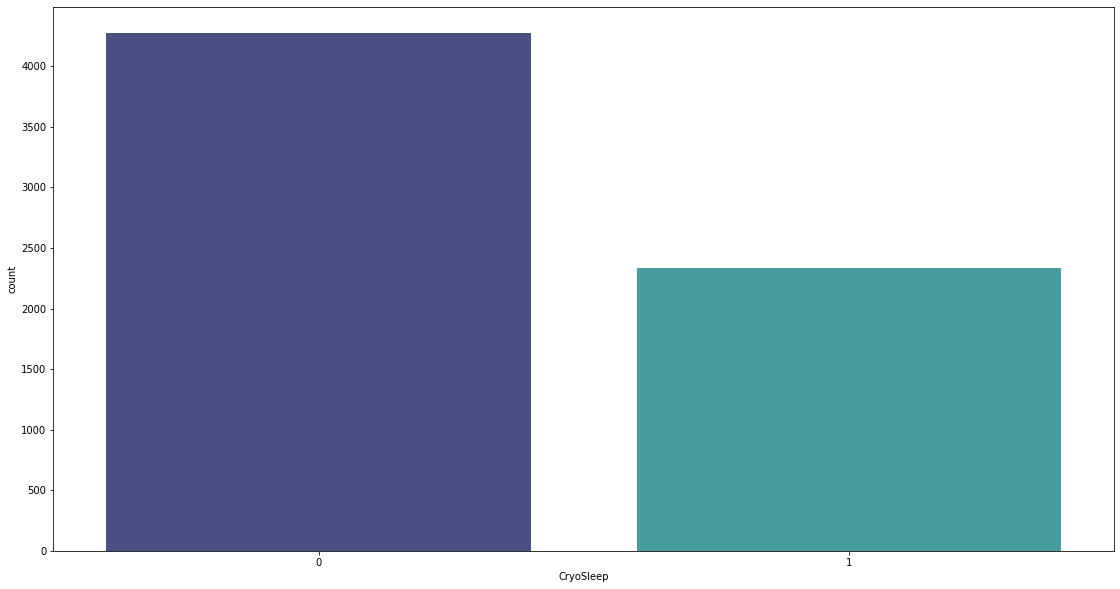

In [382]:
import numpy as np
plt.figure(figsize=(19,10))
sns.countplot(x='CryoSleep', data=df_int, palette='mako')
plt.show()

Heatmap for correlation

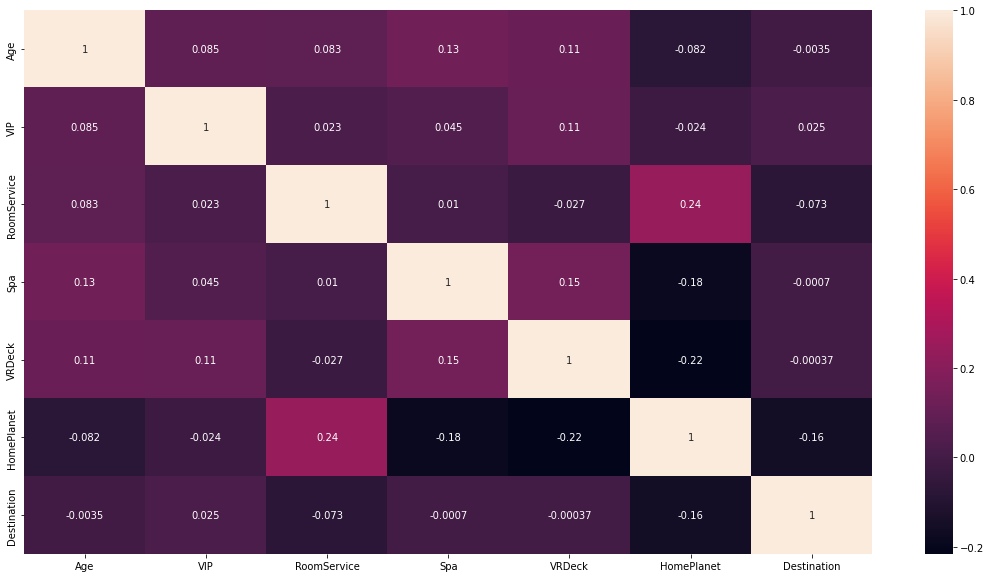

In [383]:
x_tr_corr=x_train.corr()
plt.figure(figsize=(19,10))
sns.heatmap(x_tr_corr,annot=True)
plt.show()

FROM THE HEATMAP WE CAN OBSERVE THE NEGLIGIBLE AMOUNT IN COLLINEARITY AMONG THE INDEPENDENT VARIABLES

In [384]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='all',random_state=42)
x_train_re,y_train_re=smote.fit_resample(x_train,y_train)
x_train_re.shape,y_train_re.shape

((4640, 8), (4640,))

In [385]:
lr_2=LogisticRegression(n_jobs=-1)
rfe_n=RFE(lr_2,n_features_to_select=7).fit(x_train_re,y_train_re)
pred_ts_2=rfe_n.predict(x_test)
pred_tr_2=rfe_n.predict(x_train_re)
print(rfe_n.score(x_train_re,y_train_re))
print(confusion_matrix(y_train_re,pred_tr_2))
print(confusion_matrix(y_test,pred_ts_2))

0.7497844827586206
[[1528  792]
 [ 369 1951]]
[[652 323]
 [150 857]]


In [386]:
select_features=list(x_train_re.columns[rfe_n.support_])
select_features

['Age',
 'RoomService',
 'Spa',
 'VRDeck',
 'PassengerId',
 'HomePlanet',
 'Destination']

In [387]:
results=pred_tr_2.astype(bool)

new_df_p_id=new_df['PassengerId'][:4640]

dfx=pd.DataFrame({'Passenger ID':new_df_p_id,'Predicted values':results})
dfx=dfx.iloc[:4277,:]
dfx

,Passenger ID,Predicted values
0,0001_01,True
1,0002_01,True
2,0003_01,False
3,0003_02,False
4,0004_01,True
...,...,...
5641,5998_01,False
5642,5999_01,True
5644,6000_02,True
5646,6003_01,True


In [388]:
dfx.to_csv('submission.csv',index=None)

In [389]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>